In [66]:
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns

In [2]:
df = pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
#making sure there're no null values
df.isna().sum().sum()

0

In [28]:
trgt = df.Species.unique()
print(trgt)

['Iris-virginica' 'Iris-setosa' 'Iris-versicolor']


C:\Users\benha\anaconda3\envs\py36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Species', ylabel='count'>

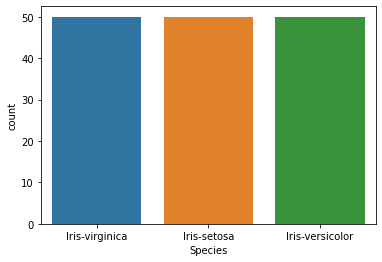

In [71]:
sns.countplot(df.Species)
#absolutely great the data isn't skewed

In [7]:
df = shuffle(df)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
143,144,6.8,3.2,5.9,2.3,Iris-virginica
16,17,5.4,3.9,1.3,0.4,Iris-setosa
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
35,36,5.0,3.2,1.2,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
...,...,...,...,...,...,...
113,114,5.7,2.5,5.0,2.0,Iris-virginica
33,34,5.5,4.2,1.4,0.2,Iris-setosa
114,115,5.8,2.8,5.1,2.4,Iris-virginica
85,86,6.0,3.4,4.5,1.6,Iris-versicolor


In [40]:
#splitting data into features and a target
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [41]:
#labeling our target with numerical values
trgt_map = {trgt[i]: i for i in range(len(trgt))}

y = y.map(trgt_map)
y

143    0
16     1
95     2
35     1
50     2
      ..
113    0
33     1
114    0
85     2
63     2
Name: Species, Length: 150, dtype: int64

In [42]:
#further splitting the data into training and testing parts
from sklearn.model_selection import train_test_split

x_train ,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 24)

In [43]:
x_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
44,45,5.1,3.8,1.9,0.4
61,62,5.9,3.0,4.2,1.5
7,8,5.0,3.4,1.5,0.2
57,58,4.9,2.4,3.3,1.0
37,38,4.9,3.1,1.5,0.1
...,...,...,...,...,...
120,121,6.9,3.2,5.7,2.3
114,115,5.8,2.8,5.1,2.4
113,114,5.7,2.5,5.0,2.0
73,74,6.1,2.8,4.7,1.2


In [44]:
#scale our features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_sc = x_train.copy()
x_sc = sc.fit_transform(x_sc.iloc[:,1:])
x_sc

array([[-8.57028755e-01,  1.68317702e+00, -1.00165836e+00,
        -9.92828614e-01],
       [ 9.03520591e-02, -1.41954688e-01,  2.80348732e-01,
         4.22095083e-01],
       [-9.75451356e-01,  7.70611165e-01, -1.22461611e+00,
        -1.25008747e+00],
       [-1.09387396e+00, -1.51080347e+00, -2.21306216e-01,
        -2.21052052e-01],
       [-1.09387396e+00,  8.61867750e-02, -1.22461611e+00,
        -1.37871690e+00],
       [-2.64915746e-01, -8.26379078e-01,  2.80348732e-01,
         1.64836229e-01],
       [-1.68598697e+00, -3.70096151e-01, -1.28035555e+00,
        -1.25008747e+00],
       [ 1.03773287e+00, -1.41954688e-01,  7.26264242e-01,
         6.79353937e-01],
       [-5.01760950e-01,  7.70611165e-01, -1.22461611e+00,
        -9.92828614e-01],
       [ 3.27197263e-01, -1.05452054e+00,  1.06070087e+00,
         2.93465656e-01],
       [-5.01760950e-01,  1.91131848e+00, -1.33609499e+00,
        -9.92828614e-01],
       [ 1.62984588e+00,  1.22689409e+00,  1.33939807e+00,
      

In [59]:
#we use a random forest classifier for our model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 0, verbose = 1)
rfc = rfc.fit(x_sc, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [60]:
#scaling our test data
x_test_sc = sc.transform(x_test.iloc[:,1:])
x_test_sc

array([[-0.02807054, -0.82637908,  0.11313042,  0.0362068 ],
       [ 0.80088767, -0.14195469,  0.83774312,  1.06524222],
       [-0.73860615,  0.77061116, -1.28035555, -1.25008747],
       [-0.97545136, -2.42336932, -0.10982734, -0.22105205],
       [ 0.20877466, -0.37009615,  0.44756705,  0.42209508],
       [ 0.56404247, -0.37009615,  1.06070087,  0.80798336],
       [-0.97545136,  0.99875263, -1.16887667, -0.73556976],
       [ 0.56404247, -0.82637908,  0.6705248 ,  0.80798336],
       [ 0.56404247,  0.77061116,  1.06070087,  1.57975993],
       [ 0.20877466,  0.77061116,  0.44756705,  0.55072451],
       [ 1.62984588, -0.14195469,  1.17217975,  0.55072451],
       [-0.14649314, -0.59823761,  0.22460929,  0.16483623],
       [ 1.03773287,  0.08618677,  0.55904593,  0.42209508],
       [ 0.68246507, -0.37009615,  0.33608817,  0.16483623],
       [ 0.09035206, -0.14195469,  0.78200368,  0.80798336]])

In [61]:
#having our classifier predict the test data
prdc = rfc.predict(x_test_sc)
prdc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


array([2, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 2, 2, 2, 0], dtype=int64)

In [65]:
#and finally we print the classifcation report
from sklearn.metrics import classification_report

print(classification_report(y_test, prdc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         7

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

